**1. Understand the dataset:**

1.1 Import the dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
a=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\STAR TECHNOLOGIES\AppData\Local\Temp\ipykernel_464\1242397264.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  a=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


1.2 Visualize the dataset

In [6]:
a.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


1.3 Print the columns of the DataFrame

In [7]:
a.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

1.4 Identify the shape of the dataset

In [8]:
a.shape

(364558, 53)

1.5 Identify the variables with null values


In [9]:
null_val=a.isna().sum()
null_val

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

**2. Perform basic data exploratory analysis:**

***2.1 Draw a frequency plot to show the number of null values in 
each column of the DataFrame***

<Axes: title={'center': 'Frequency plot'}, xlabel='columns in the data', ylabel='no.of null values'>

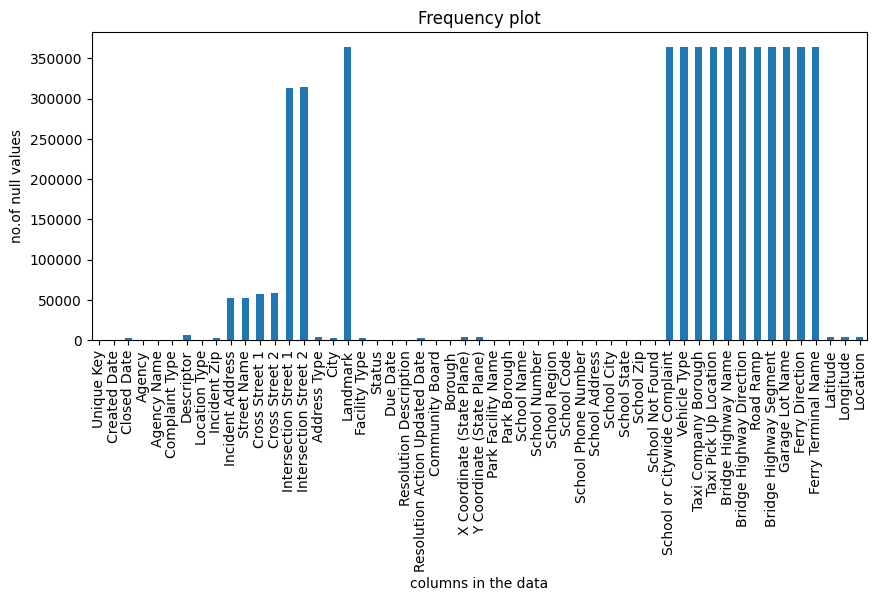

In [14]:
null_val.plot(kind='bar',
xlabel='columns in the data',
ylabel='no.of null values',
title='Frequency plot',
figsize=(10,4))

***2.2 Missing value treatment***

2.2.1 Remove the records whose Closed Date values are 
null

In [15]:
a.dropna(subset=['Closed Date'],inplace=True)
print('No.of null vlaues after removing in Closed Date :',a['Closed Date'].isna().sum())

No.of null vlaues after removing in Closed Date : 0


***2.3 Analyze the date column, and remove entries that have an 
incorrect timeline***

In [18]:
a.dropna(subset=['Created Date'],inplace=True)
a['Created Date'].isna().sum()

0

In [19]:
a.dropna(subset=['Closed Date'],inplace=True)
a['Closed Date'].isna().sum()

0

In [20]:
a.dropna(subset=['Due Date'],inplace=True)
a['Due Date'].isna().sum()

0

2.3.1 Calculate the time elapsed in closed and creation date

In [24]:
a['Created Date']=pd.to_datetime(a['Created Date'])

In [ ]:
a['Closed Date']=pd.to_datetime(a['Closed Date'],errors='coerce')

In [26]:
a['Due Date']=pd.to_datetime(a['Due Date'])

In [27]:
a['Elapsed Time']=a['Closed Date']-a['Created Date']
a['Elapsed Time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Elapsed Time, Length: 362176, dtype: timedelta64[ns]

2.3.2 Convert the calculated date to seconds to get a better 
representation

In [28]:
a['Elapsed Time']=a['Elapsed Time'].dt.seconds
a['Elapsed Time']

0          3330
1          5233
2         17494
3         27927
4         12464
          ...  
364553    37067
364554     8434
364555     1143
364556     9653
364557    10020
Name: Elapsed Time, Length: 362176, dtype: int32

2.3.3 View the descriptive statistics for the newly created 
column

In [29]:
a['Elapsed Time'].describe()

count    362176.000000
mean      13898.307072
std       13631.157518
min           1.000000
25%        4509.000000
50%        9539.000000
75%       18613.000000
max       86399.000000
Name: Elapsed Time, dtype: float64

2.3.4 Check the number of null values in the Complaint_Type
and City columns

In [32]:
print('Number of null values in Complaint_Type : ',a['Complaint Type'].isna().sum())

Number of null values in Complaint_Type :  0


In [33]:
print('Number of null values in City : ',a['City'].isna().sum())

Number of null values in City :  674


2.3.5 Impute the NA value with Unknown City

In [34]:
a['City'].fillna(value='Unknown City',inplace=True)
print('No.of null values in City : ',a['City'].isna().sum())

No.of null values in City :  0


2.3.6 Draw a frequency plot for the complaints in each city

<Axes: title={'center': 'Frequency plot for complaints in each city'}, xlabel='City', ylabel='No.of complaints'>

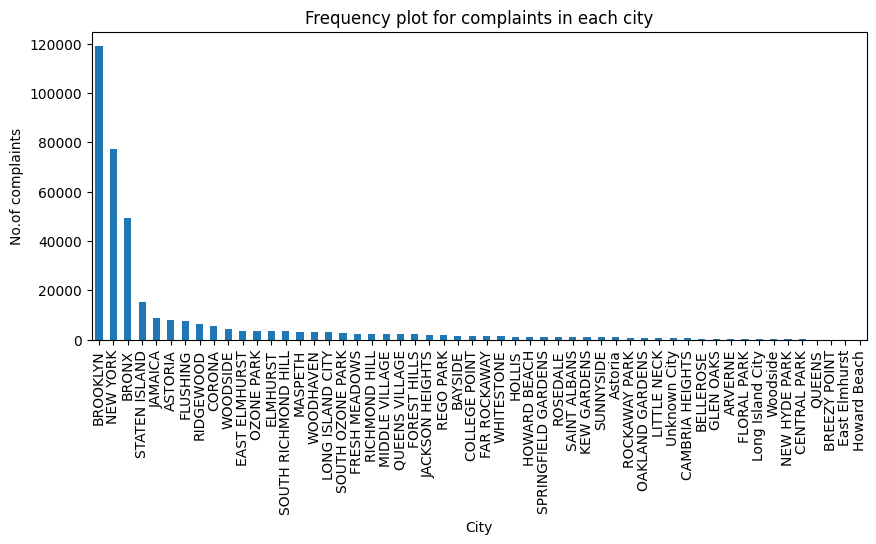

In [35]:
city_count=a['City'].value_counts()
city_count.plot(kind='bar',
xlabel='City',
ylabel='No.of complaints',
title='Frequency plot for complaints in each city',
figsize=(10,4))

2.3.7 Create a scatter and hexbin plot of the concentration of 
complaints across Brooklyn

In [36]:
city=a.groupby('City')
brooklyn=city.get_group('BROOKLYN')
brooklyn.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Elapsed Time
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",6821
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",5022
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",30649
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",3078
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",10589


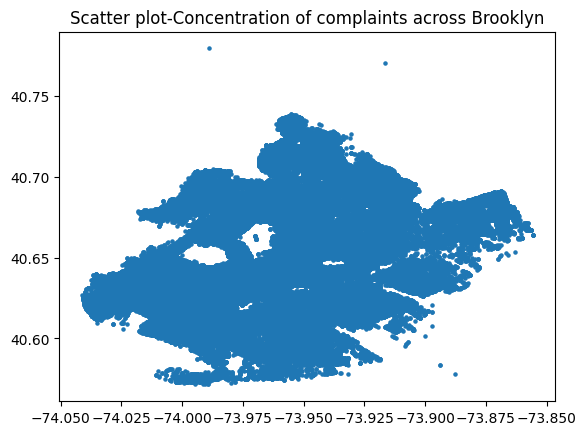

In [40]:
plt.scatter(x=brooklyn['Longitude'],y=brooklyn['Latitude'],s=5)
plt.title('Scatter plot-Concentration of complaints across Brooklyn')
plt.show()

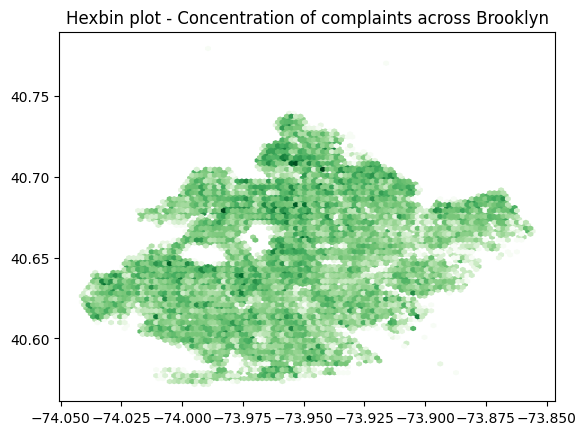

In [50]:
plt.hexbin(x=brooklyn['Longitude'],y=brooklyn['Latitude'],cmap='Greens',bins='log')
plt.title('Hexbin plot - Concentration of complaints across Brooklyn')
plt.show()

**3. Find major types of complaints:**

3.1 Plot a bar graph to show the types of complaints

<Axes: xlabel='Complaint Type'>

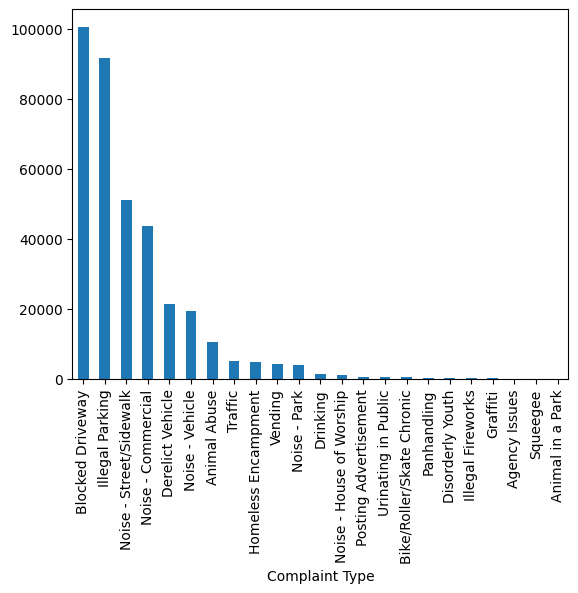

In [52]:
complaints_count=a['Complaint Type'].value_counts()
complaints_count.plot(kind='bar')

3.2 Check the frequency of various types of complaints for New 
York City

In [53]:
newyork=a.loc[a['City']=='NEW YORK']
newyork['Complaint Type'].value_counts()

Complaint Type
Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: count, dtype: int64

3.3 Find the top 10 complaint types

In [54]:
complaints_count.head(10)

Complaint Type
Blocked Driveway           100623
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: count, dtype: int64

3.4 Display the various types of complaints in each city

In [55]:
various=list(a['City'].unique())

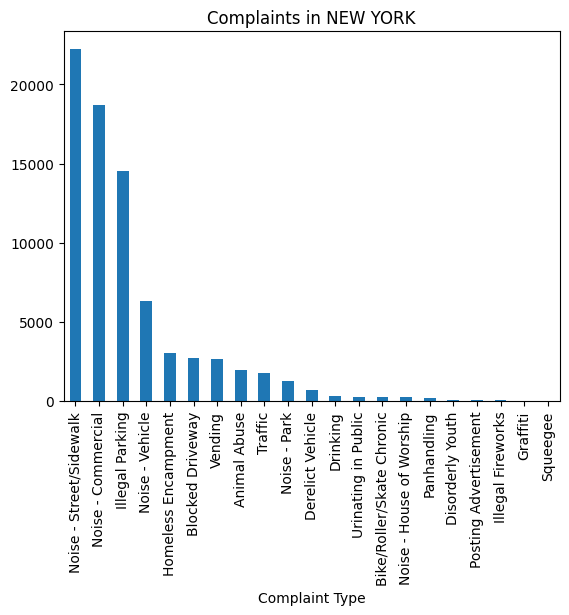

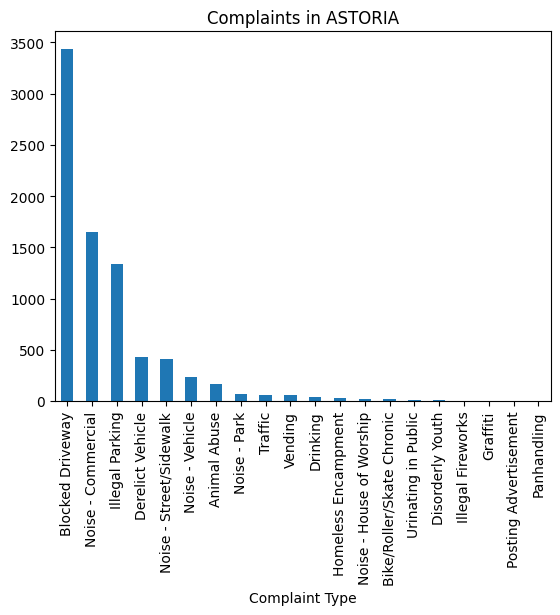

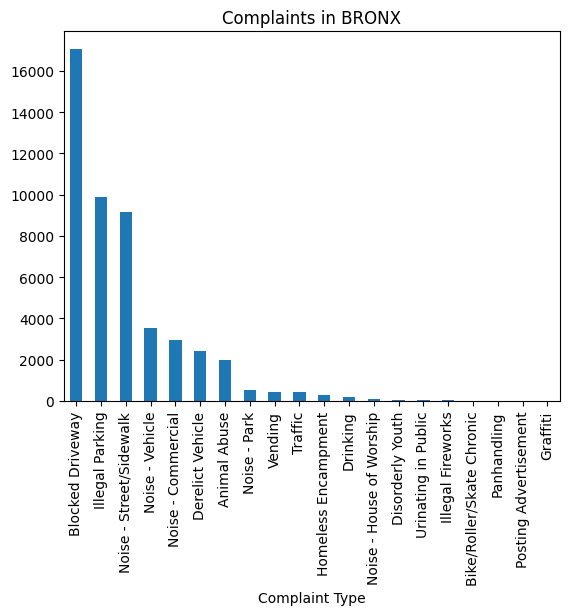

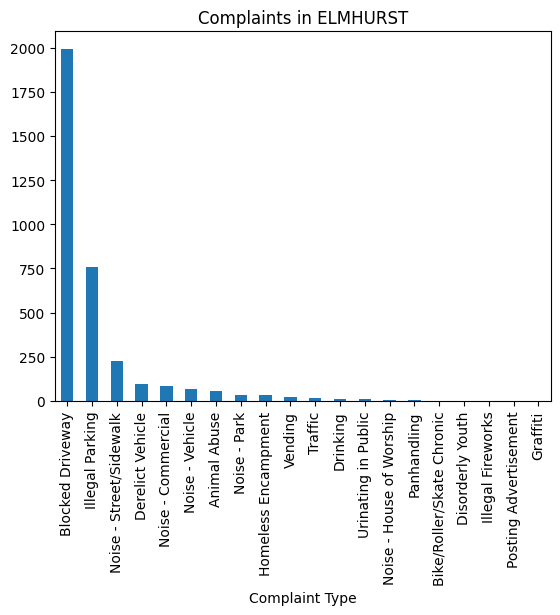

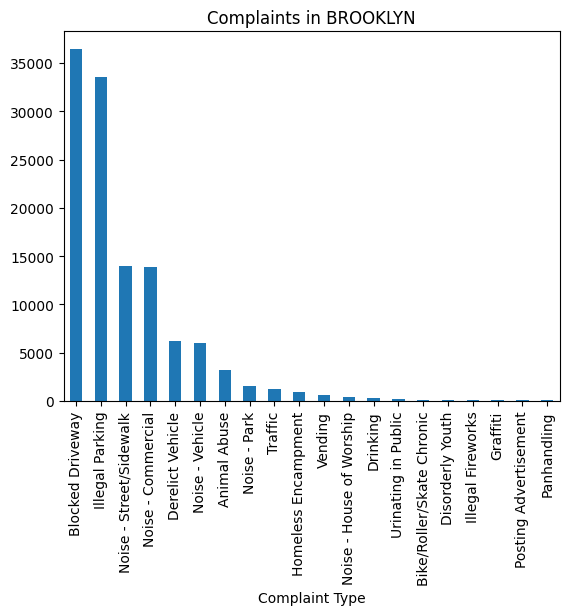

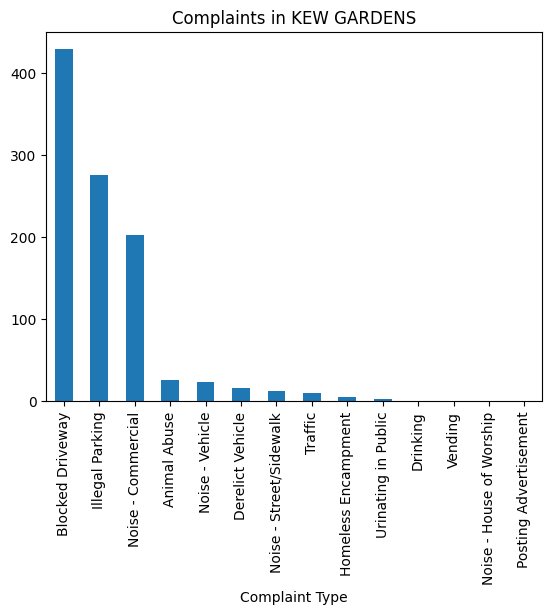

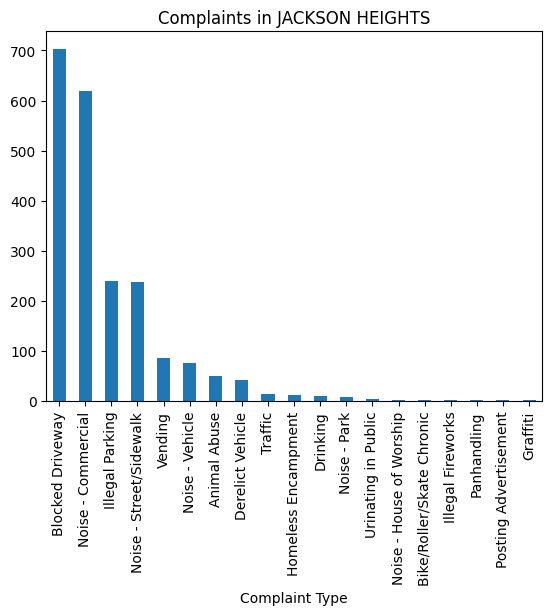

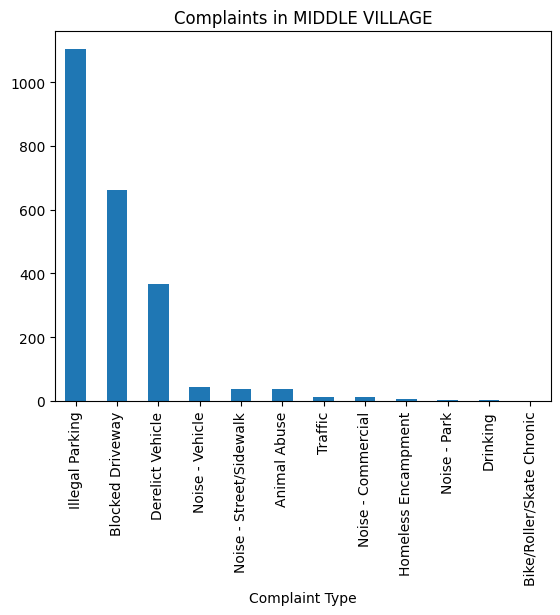

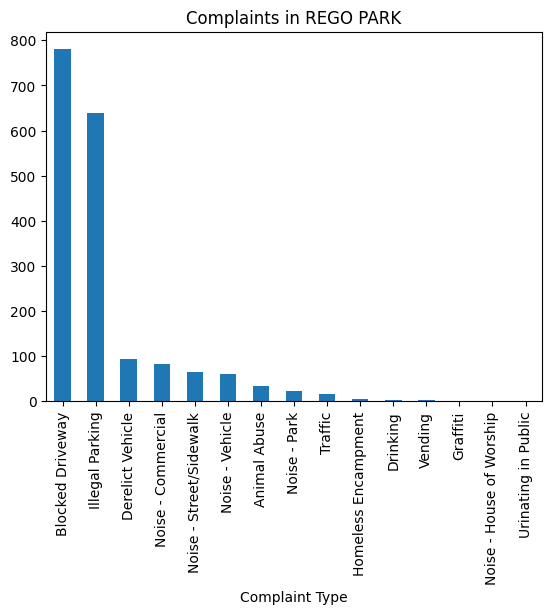

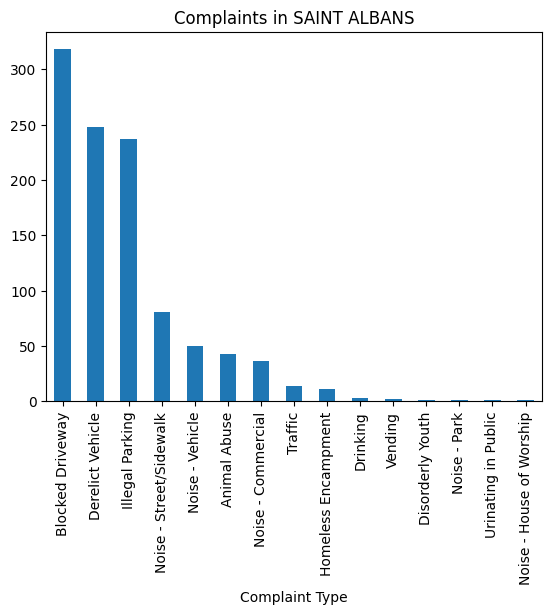

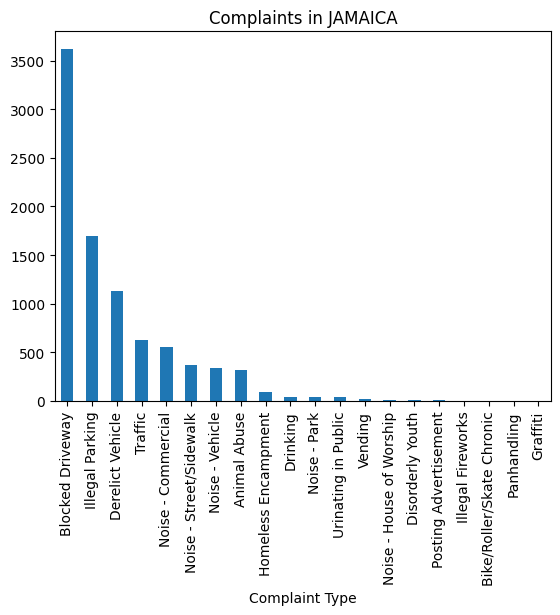

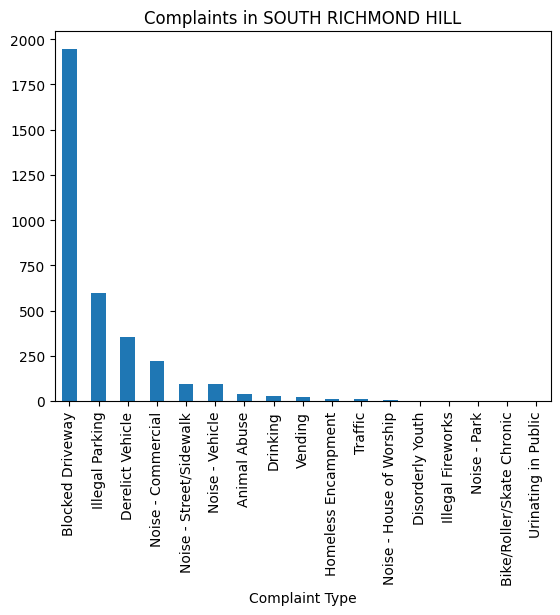

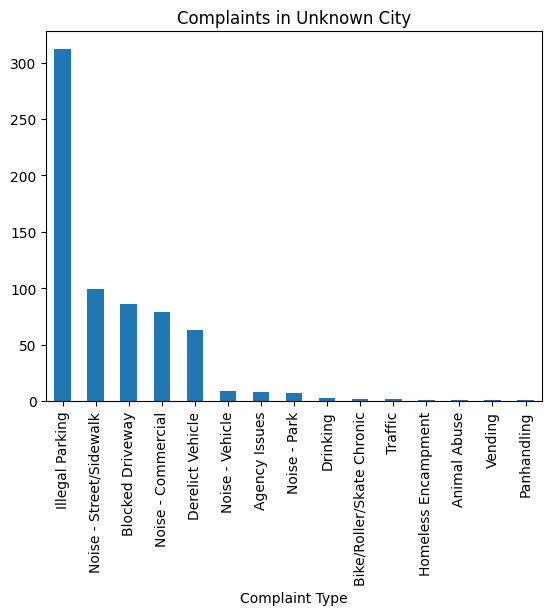

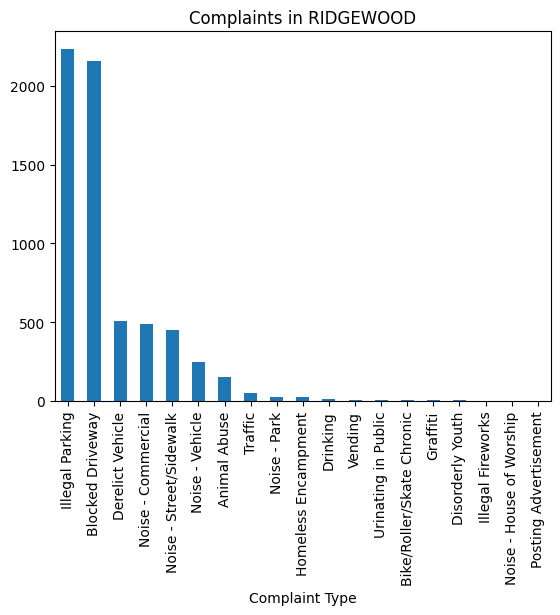

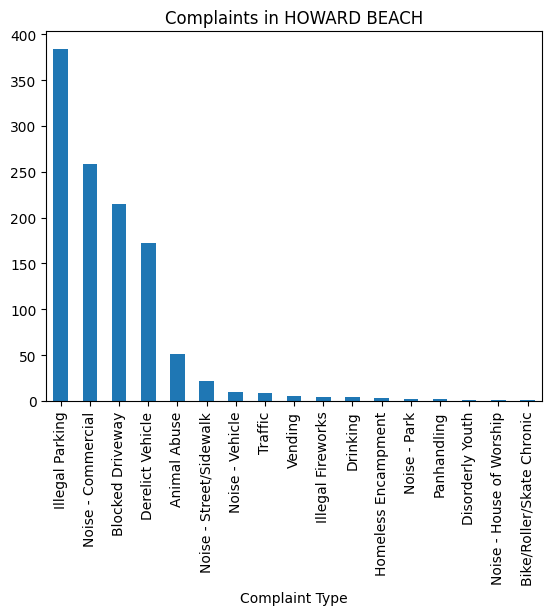

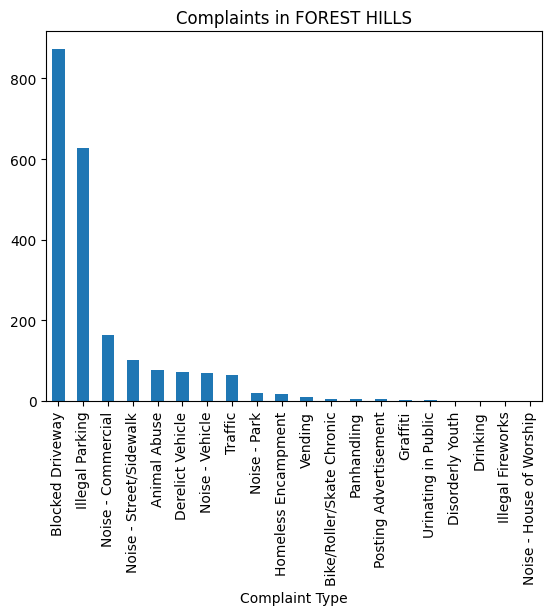

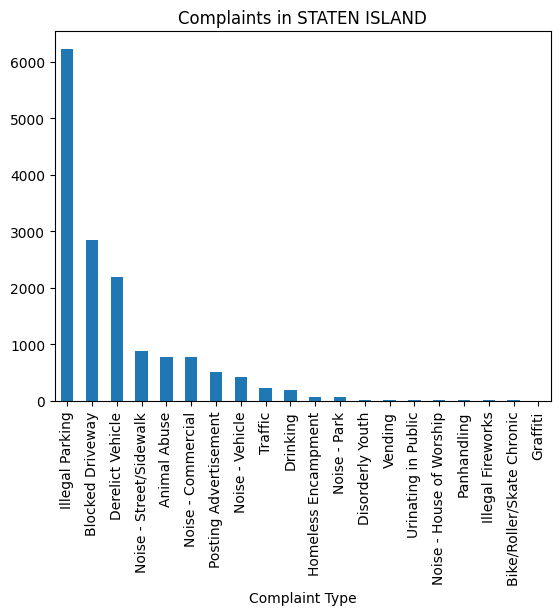

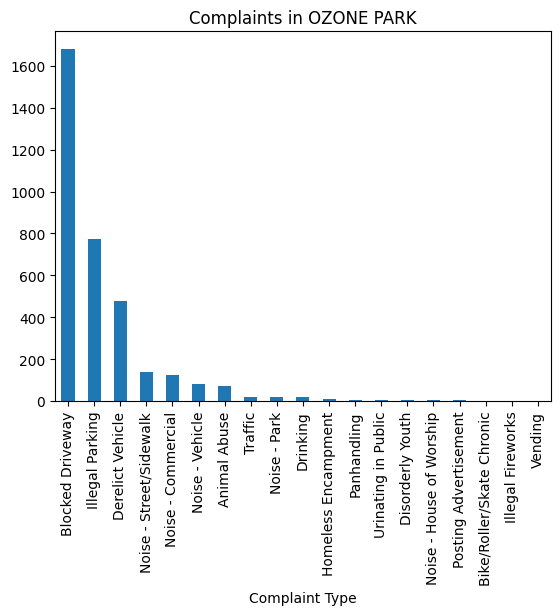

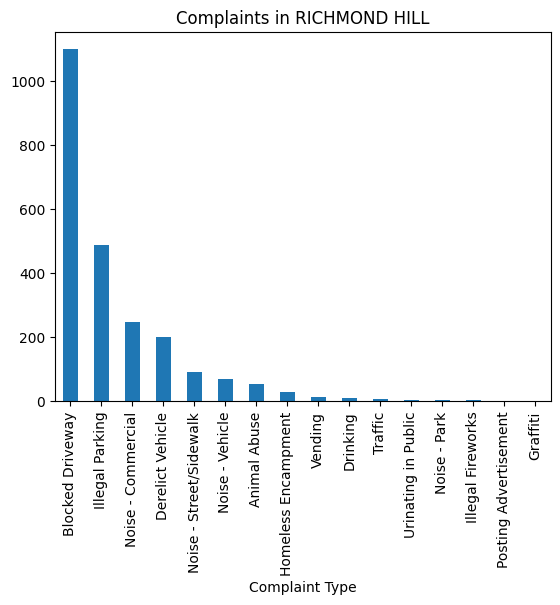

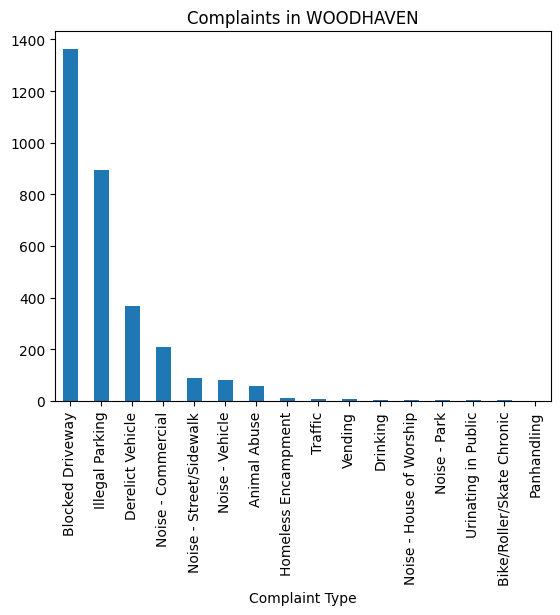

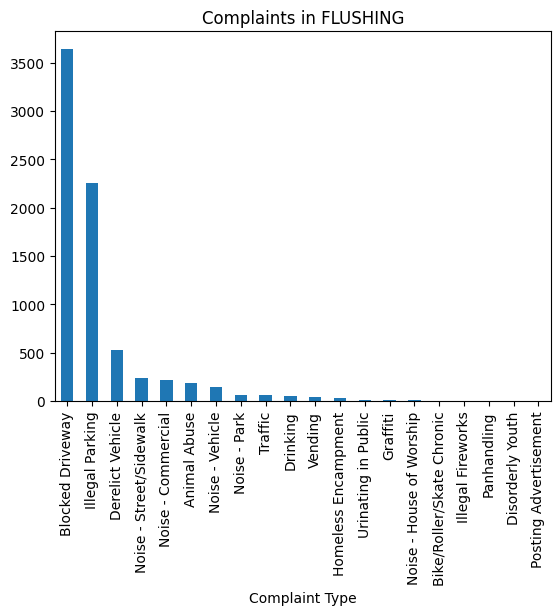

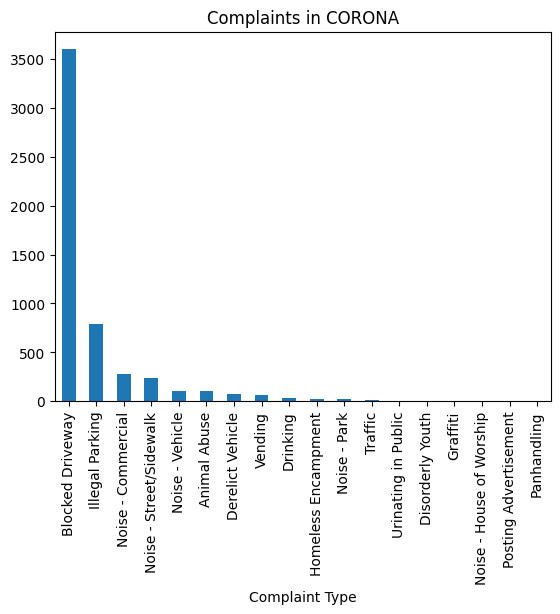

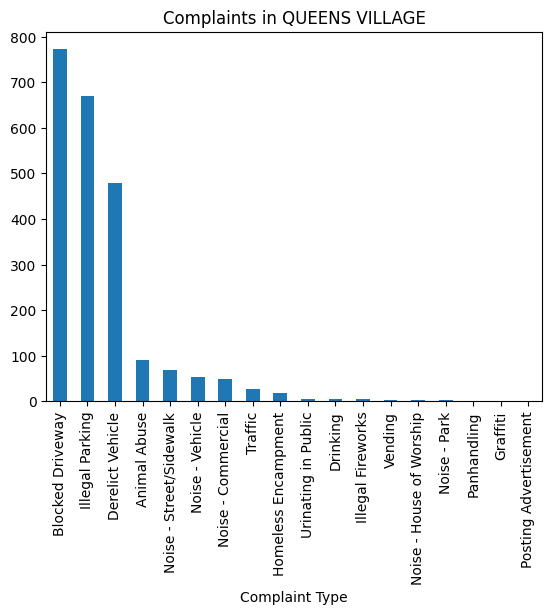

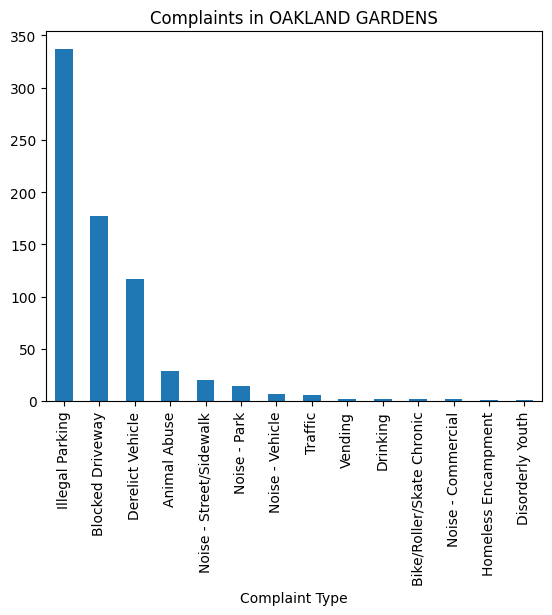

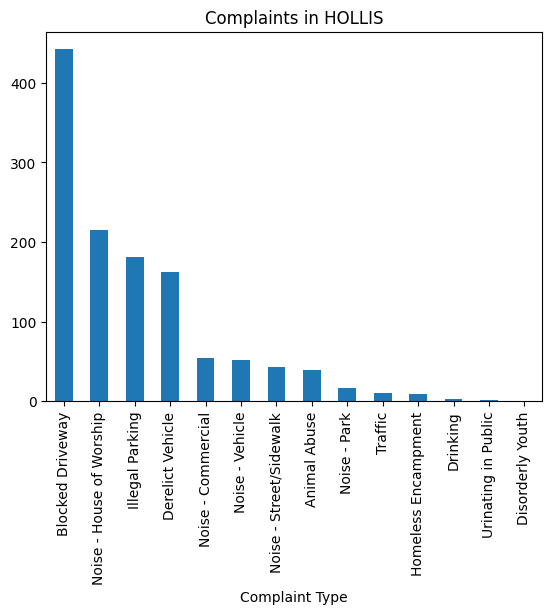

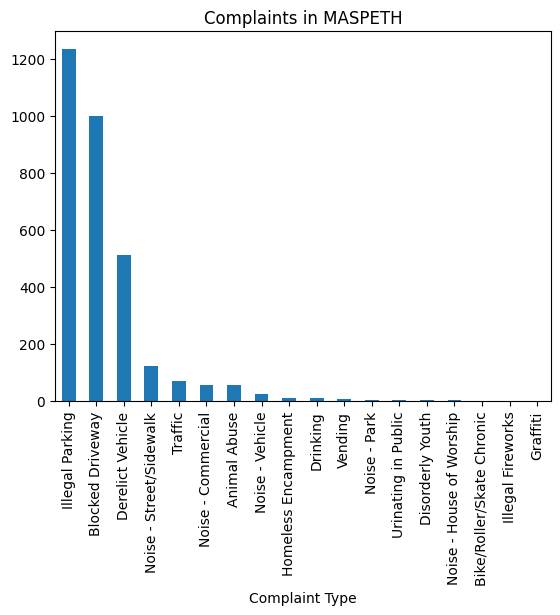

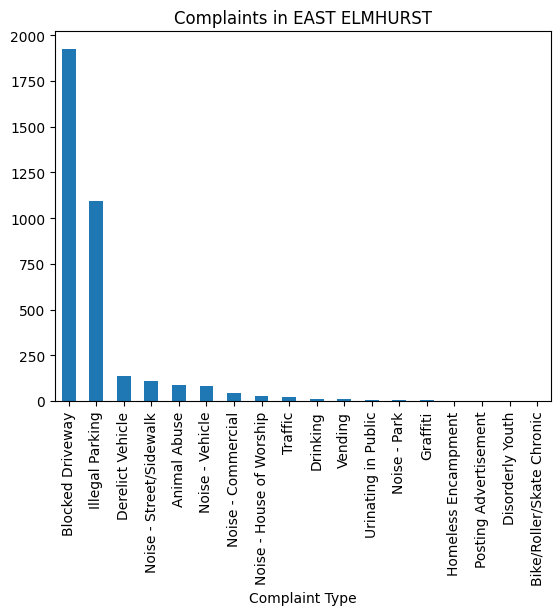

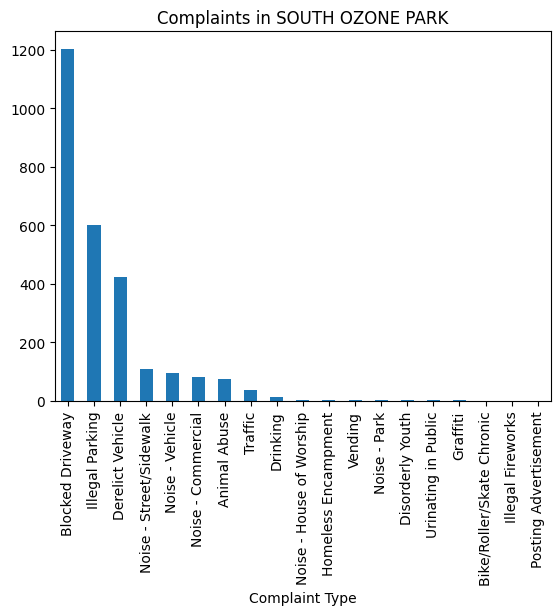

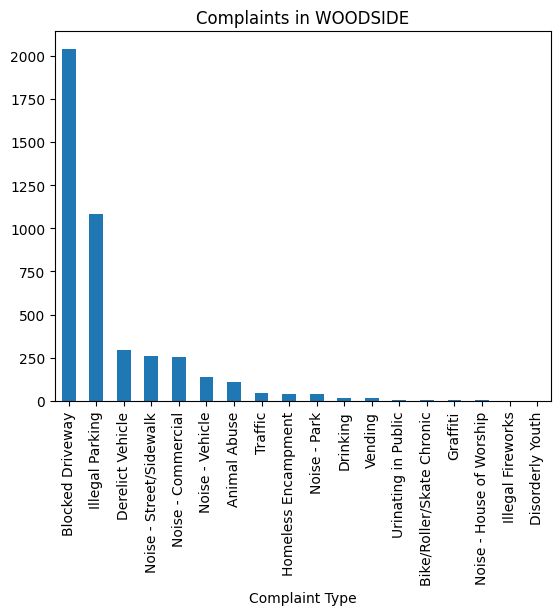

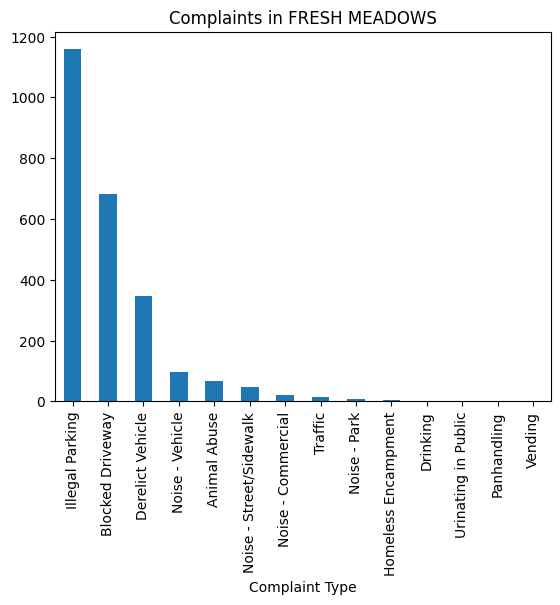

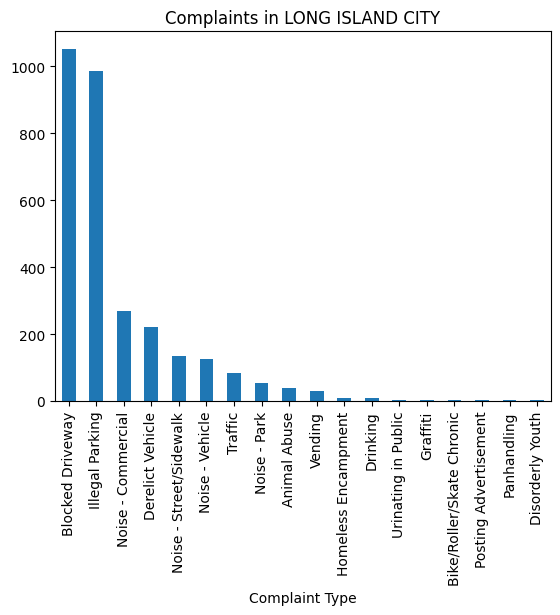

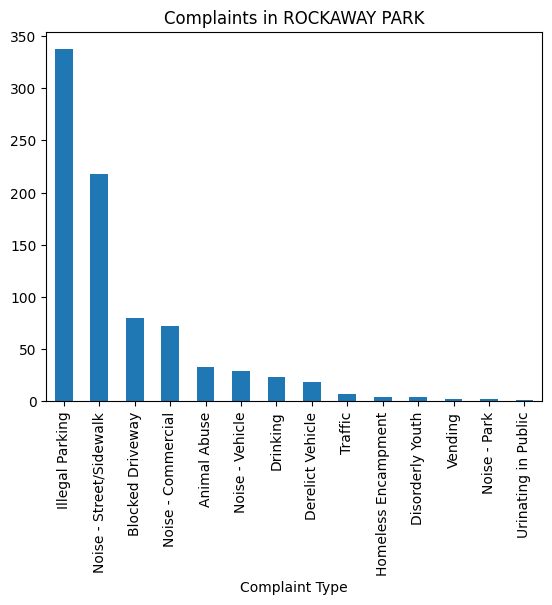

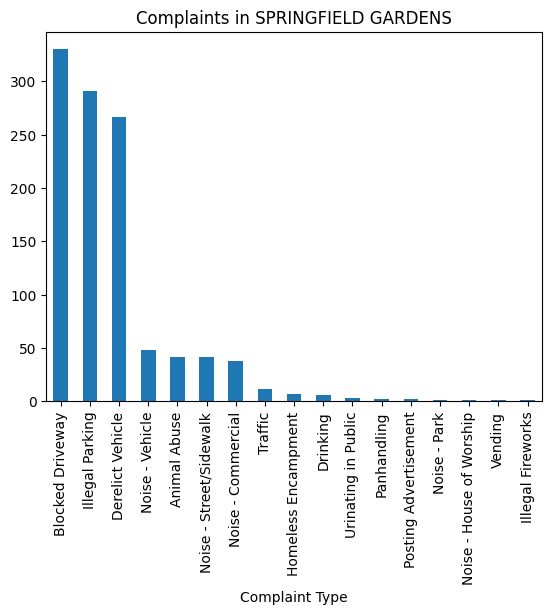

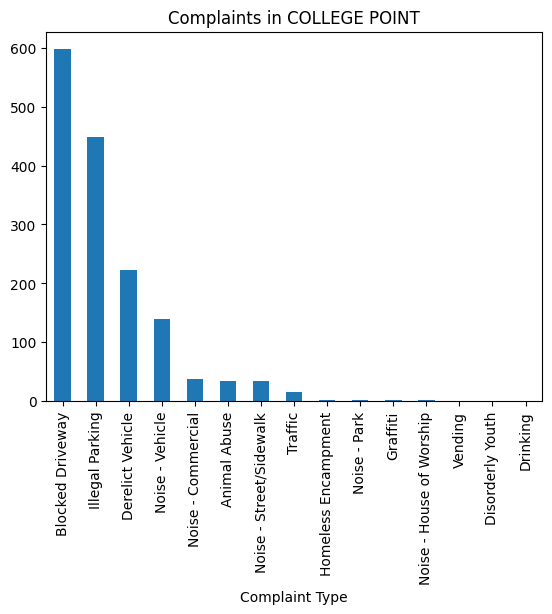

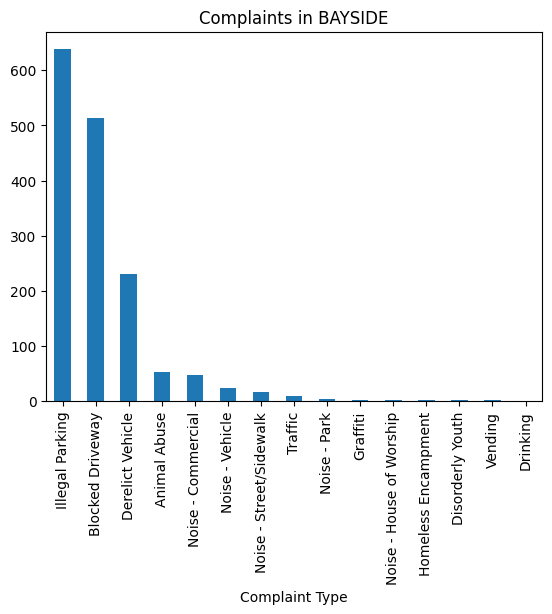

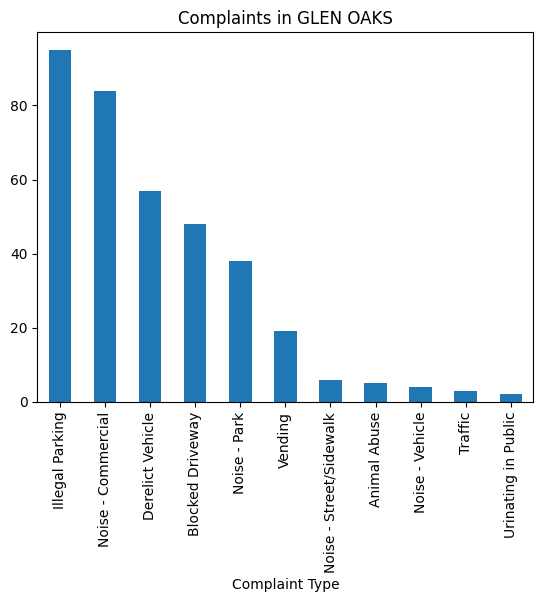

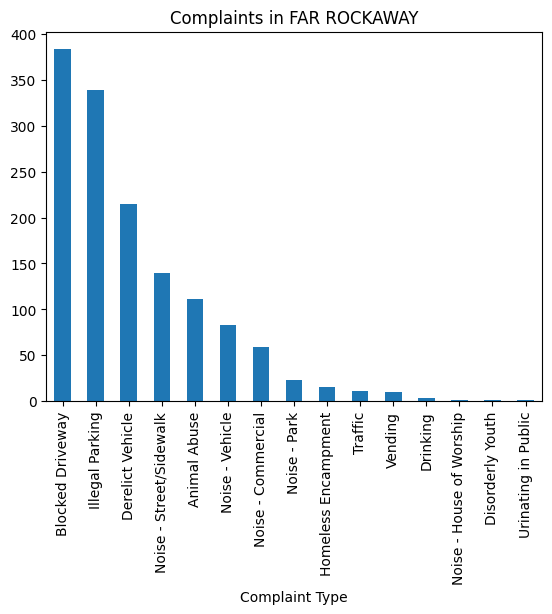

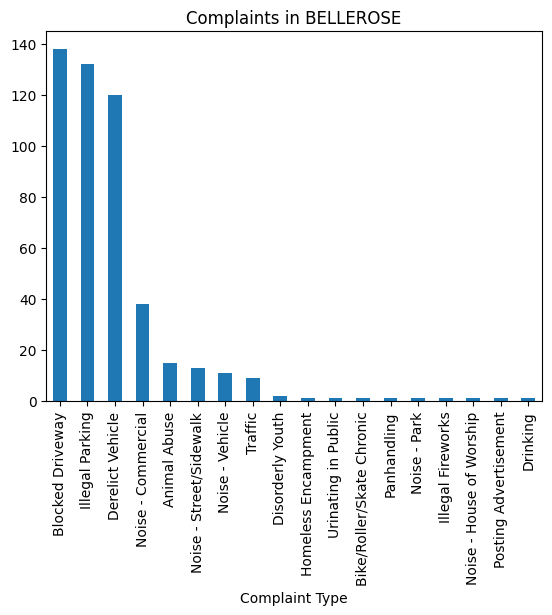

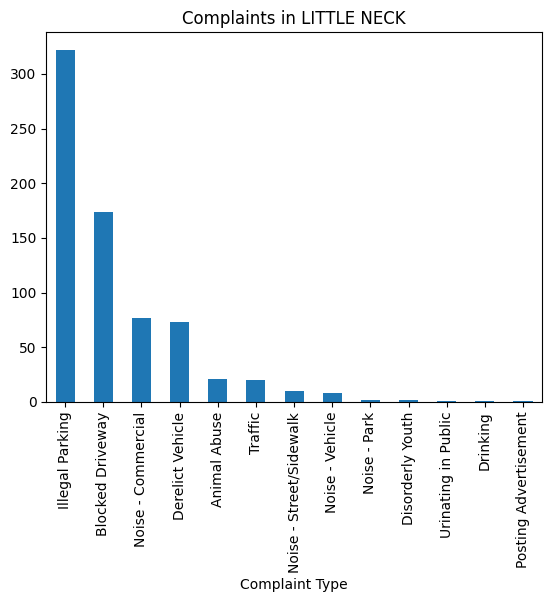

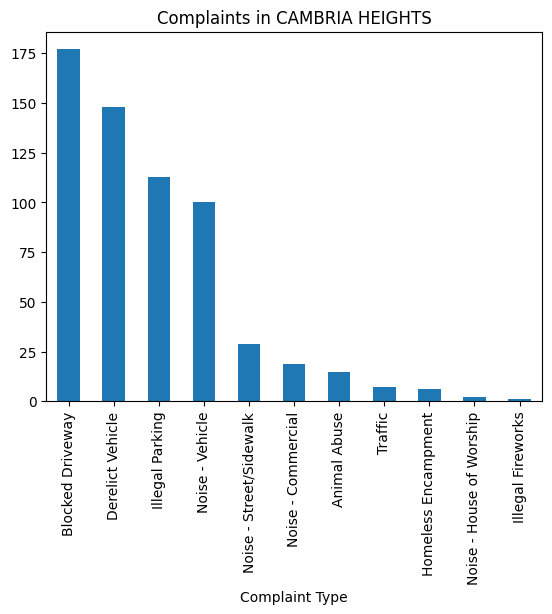

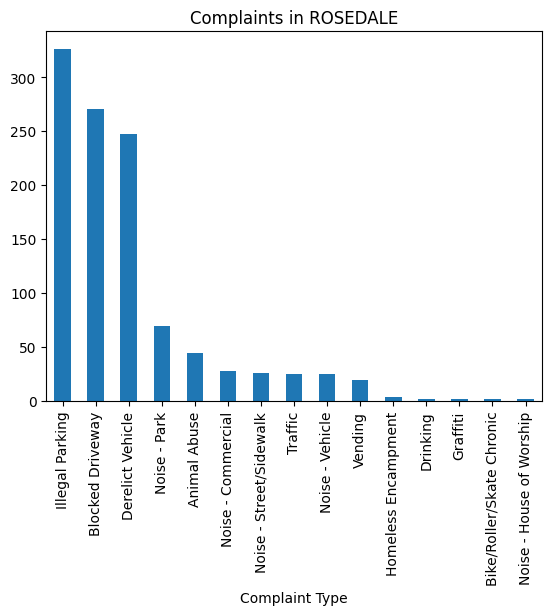

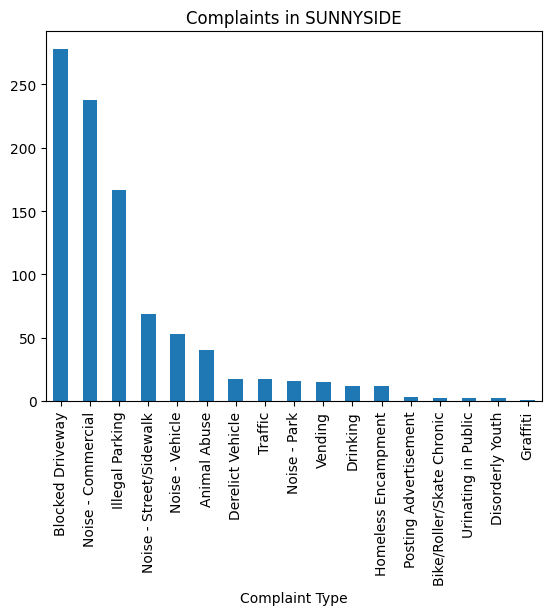

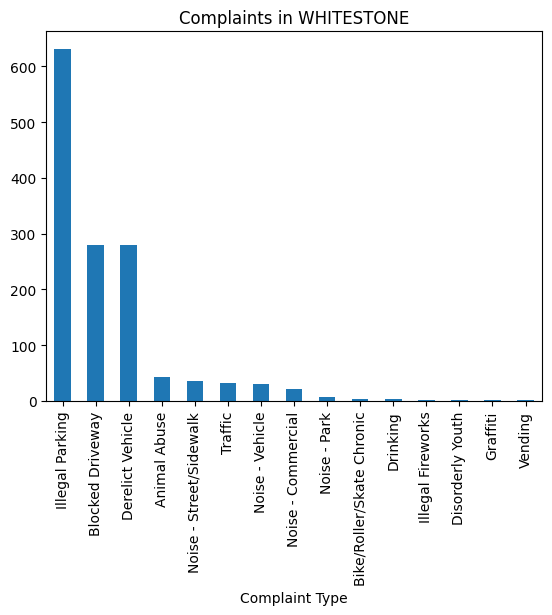

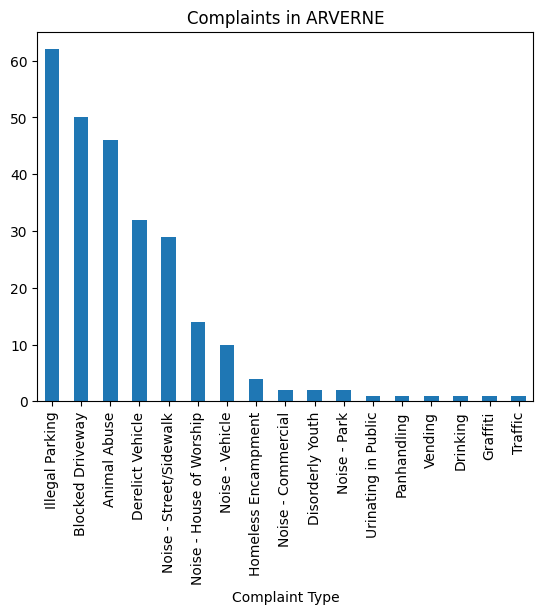

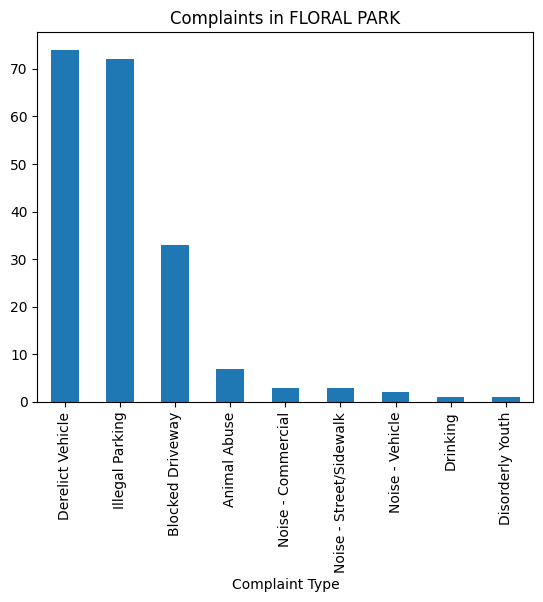

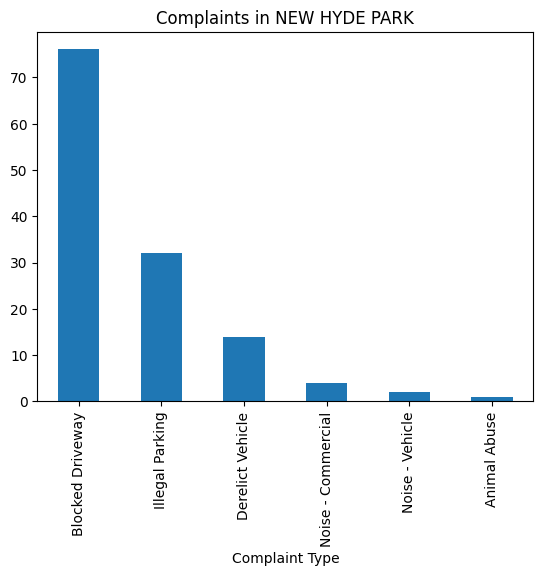

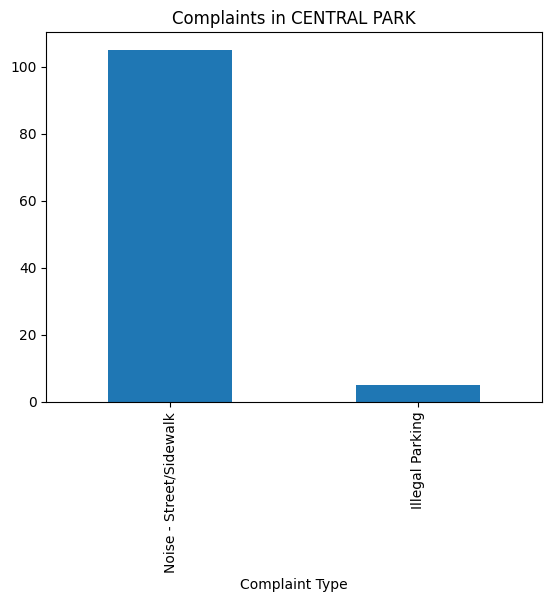

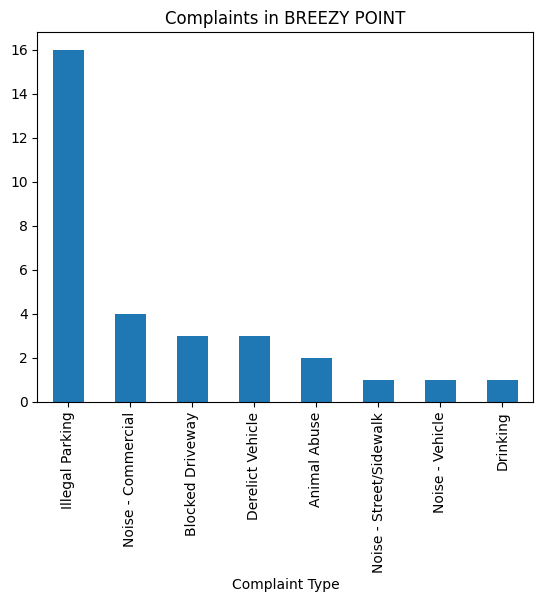

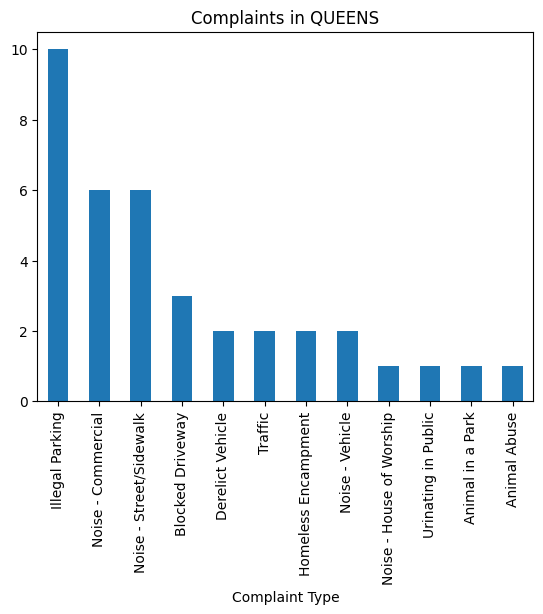

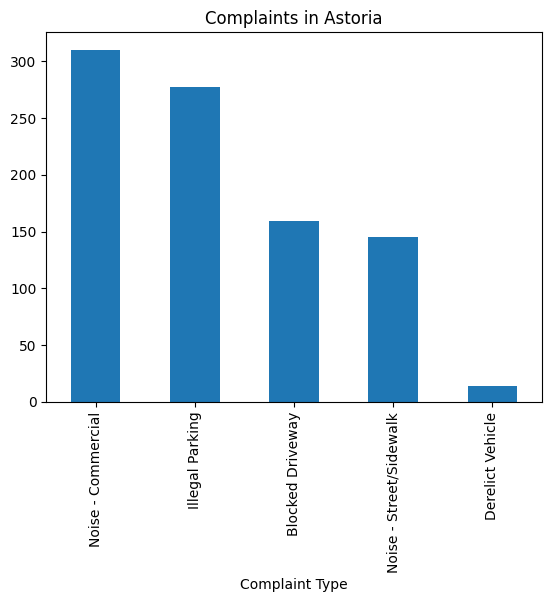

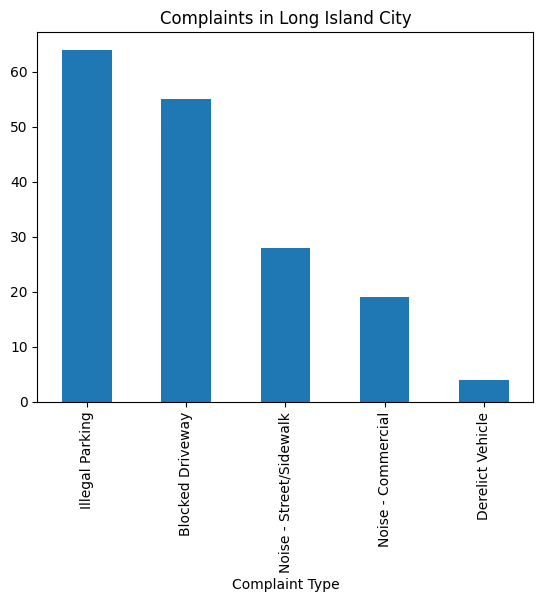

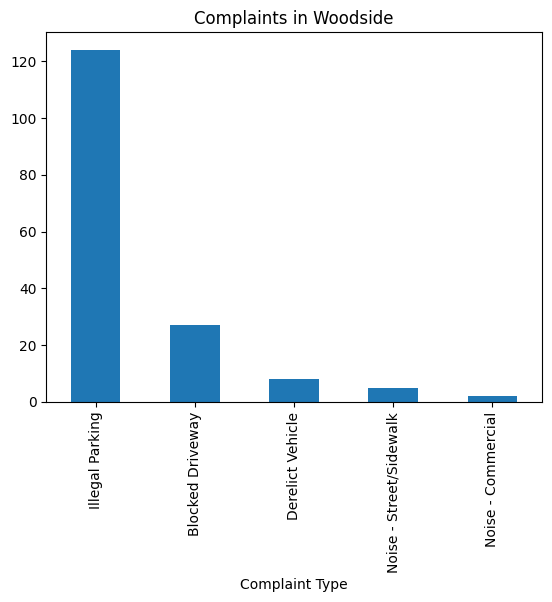

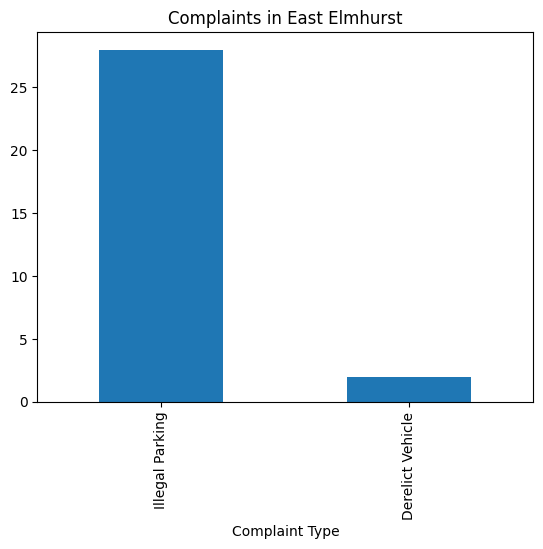

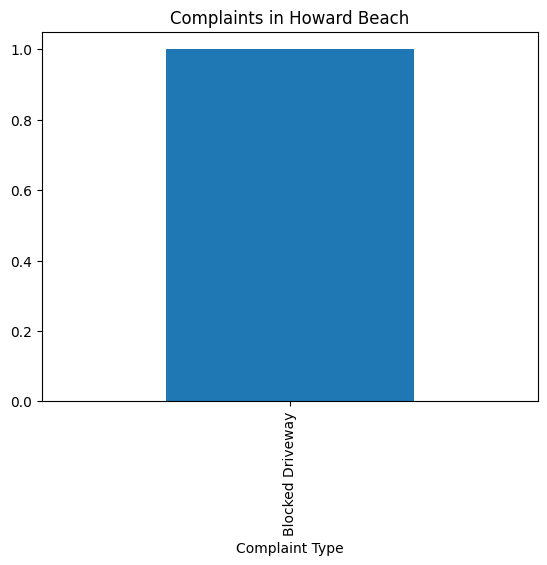

In [56]:
for i in various:
    data=a.loc[a['City']==i]
    city_complaint=data['Complaint Type'].value_counts()
    city_complaint.plot(kind='bar',title='Complaints in '+i)
    plt.show()

3.5 Create a DataFrame, df_new, which contains cities as 
columns and complaint types in rows

In [57]:
df_new=a.pivot_table(index='Complaint Type',columns='City',aggfunc=len,fill_value=0)
df_new=df_new['Address Type']
df_new.head()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36444,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27


**4. Visualize the major types of complaints in each city**

4.1 Draw another chart that shows the types of complaints in 
each city in a single chart, where different colors show the 
different types of complaints

In [58]:
single_chart=a.pivot_table(columns='Complaint Type',index='City',aggfunc=len,fill_value=0)
single_chart=single_chart['Address Type']
single_chart.head()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,0,170,0,16,3436,426,5,43,4,32,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,0,53,0,0,514,231,2,1,3,2,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,0,15,0,1,138,120,2,1,0,1,...,1,1,13,11,1,1,0,9,1,0


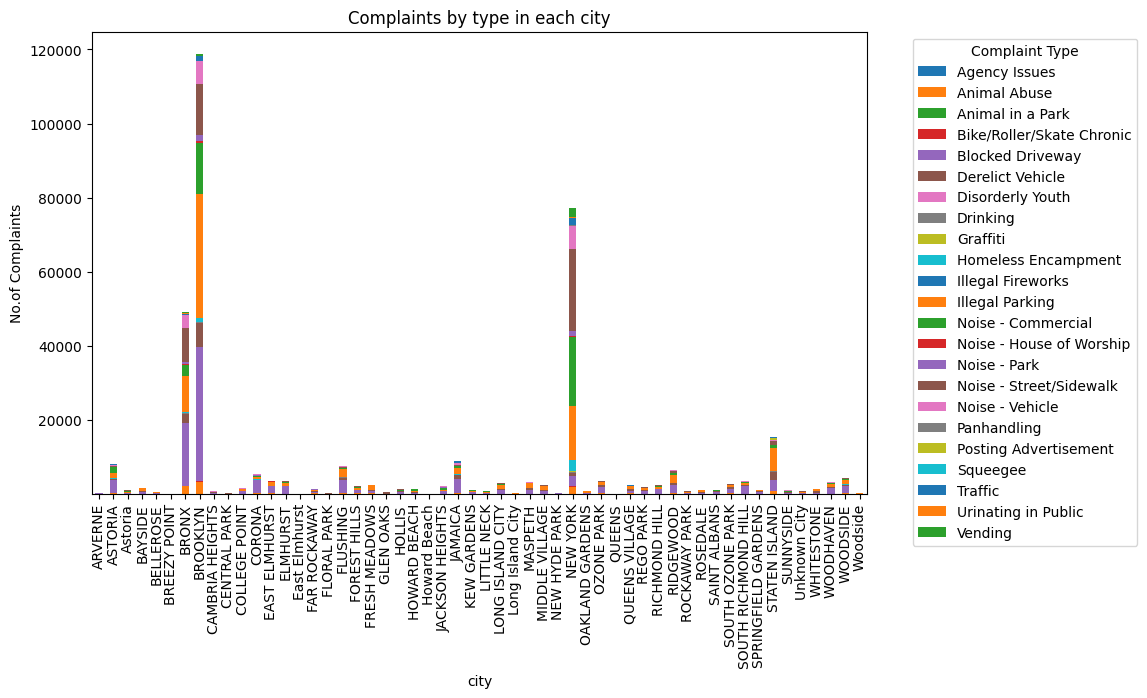

In [60]:
single_chart.plot(kind='bar',stacked=True,figsize=(10,6))
plt.xlabel('city')
plt.ylabel('No.of Complaints')
plt.title('Complaints by type in each city')
plt.legend(title='Complaint Type',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

4.2 Sort the complaint types based on the average 
Request_Closing_Time grouping them for different 
locations

In [64]:
unique_cities = a['City'].unique()
for i in unique_cities:
    average_closing_time = a[a['City'] == i].groupby(['City', 'Complaint Type'])['Elapsed Time'].mean()
    sorted_complaints = average_closing_time.groupby('City', group_keys=False).apply(lambda x: x.sort_values(ascending=False))
    print(sorted_complaints)
    print("\n")


City      Complaint Type           
NEW YORK  Graffiti                     17321.200000
          Squeegee                     14560.250000
          Derelict Vehicle             14422.306475
          Panhandling                  12619.116505
          Homeless Encampment          12570.194771
          Animal Abuse                 12444.560021
          Blocked Driveway             12153.471349
          Vending                      11735.691054
          Illegal Parking              11489.092377
          Posting Advertisement        10721.448980
          Drinking                     10627.803738
          Urinating in Public          10342.284091
          Noise - Park                 10031.418343
          Bike/Roller/Skate Chronic     9823.027559
          Traffic                       9268.226682
          Noise - Street/Sidewalk       9241.044774
          Noise - Vehicle               9179.134255
          Noise - Commercial            9093.682329
          Disorderly Youth  

**5. See whether the average response time across different 
complaint types is similar (overall)**

In [70]:
avg_res_time=a.groupby('Complaint Type')['Elapsed Time'].mean()
print('Average response time in seconds across different complaint types')
avg_res_time

Average response time in seconds across different complaint types


Complaint Type
Agency Issues                18289.125000
Animal Abuse                 16260.248338
Animal in a Park              3034.000000
Bike/Roller/Skate Chronic    12396.109474
Blocked Driveway             15214.113930
Derelict Vehicle             19730.229343
Disorderly Youth             12089.463492
Drinking                     12959.762108
Graffiti                     19424.114650
Homeless Encampment          14565.957163
Illegal Fireworks             9611.156977
Illegal Parking              14530.351934
Noise - Commercial           10572.309410
Noise - House of Worship     10662.997191
Noise - Park                 11676.679139
Noise - Street/Sidewalk      11460.877530
Noise - Vehicle              11881.379307
Panhandling                  13726.781538
Posting Advertisement         7159.010309
Squeegee                     14560.250000
Traffic                      11361.314088
Urinating in Public          12285.346334
Vending                      13643.697730
Name: Elapsed Time,

5.1 Visualize the average of Request_Closing_Time

<Axes: title={'center': 'Average of Request_closing_time'}, xlabel='Complaint Type'>

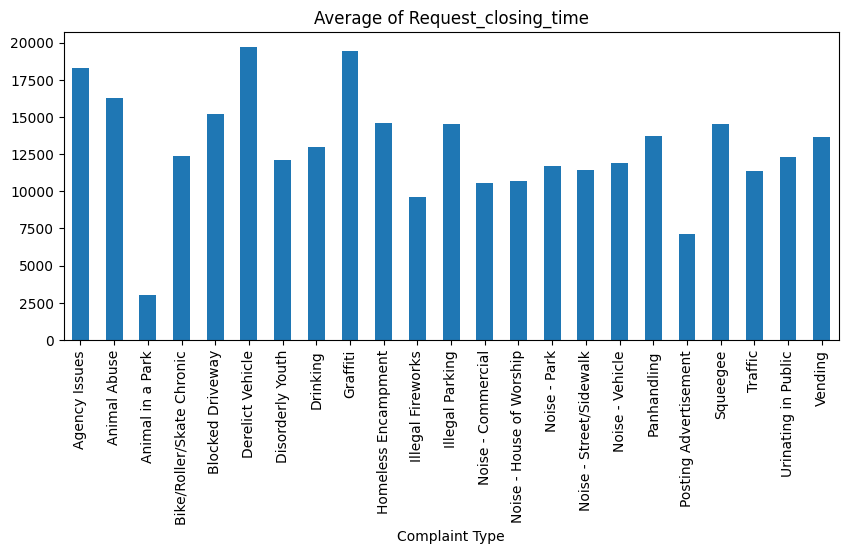

In [71]:
avg_res_time.plot(kind='bar',figsize=(10,4),title='Average of Request_closing_time')

**6. Identify the significant variables by performing statistical 
analysis using p-values**

In [81]:
import pandas as pd
from scipy.stats import chi2_contingency
target_column = 'Complaint Type'
categorical_columns = ['City','Borough','Bridge Highway Name','Community Board']
p_values_df = pd.DataFrame(columns=['Variable', 'P-Value'])

for column in categorical_columns:
    contingency_table = pd.crosstab(a[target_column], a[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values_df = pd.concat([p_values_df, pd.DataFrame({'Variable': [column], 'P-Value': [p]})], ignore_index=True)

p_values_df.sort_values(by='P-Value', ascending=True, inplace=True)
print(p_values_df)



              Variable  P-Value
0                 City  0.00000
1              Borough  0.00000
3      Community Board  0.00000
2  Bridge Highway Name  0.01136


**7. Perform a Kruskal-Wallis H test**

In [83]:

from scipy.stats import kruskal
groups = [group_data for _, group_data in a.groupby('City')['Elapsed Time']]
statistic, p_value = kruskal(*groups)
alpha = 0.05

if p_value < alpha:
    print("Reject H0: One or more sample distributions are not equal")
else:
    print("Fail to reject H0: All sample distributions are equal")

print("Kruskal-Wallis H Statistic:", statistic)
print("P-Value:", p_value)


Reject H0: One or more sample distributions are not equal
Kruskal-Wallis H Statistic: 20152.7160674815
P-Value: 0.0
